# 이미지 분석 고도화 및 Use Case 확대 (11BT 공정 VGG16Net, 엄선현)

In [1]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:\Users\USER\A\11BT_final\normal') #현재의 기본 디렉토리를 정상데이터가 모인 곳으로 디렉토리 변경하는 코드

In [3]:
normal_filename = os.listdir(r'C:\Users\USER\A\11BT_final\normal') 
#normal_filename 변수을 선언하여 정상데이터 있는 파일의 데이터 이름들을 담아내는 코드

In [4]:
normal_filename #정상데이터의 이름들이 담긴 normal_filename 변수 확인

['normal (1).png',
 'normal (10).png',
 'normal (100).png',
 'normal (101).png',
 'normal (102).png',
 'normal (103).png',
 'normal (104).png',
 'normal (105).png',
 'normal (106).png',
 'normal (107).png',
 'normal (108).png',
 'normal (109).png',
 'normal (11).png',
 'normal (110).png',
 'normal (111).png',
 'normal (112).png',
 'normal (113).png',
 'normal (114).png',
 'normal (115).png',
 'normal (116).png',
 'normal (117).png',
 'normal (118).png',
 'normal (119).png',
 'normal (12).png',
 'normal (120).png',
 'normal (121).png',
 'normal (122).png',
 'normal (123).png',
 'normal (124).png',
 'normal (125).png',
 'normal (126).png',
 'normal (127).png',
 'normal (128).png',
 'normal (129).png',
 'normal (13).png',
 'normal (130).png',
 'normal (131).png',
 'normal (132).png',
 'normal (133).png',
 'normal (134).png',
 'normal (135).png',
 'normal (136).png',
 'normal (137).png',
 'normal (138).png',
 'normal (139).png',
 'normal (14).png',
 'normal (140).png',
 'normal (141).png',

In [5]:
len(normal_filename) #데이터의 수를 확인하기 위한 코드

620

In [6]:
data=[] #정상 데이터의 이미지 정보를 담을 data 변수 선언
label=[] #정상(0)과 불량(1)을 구분하기 위한 label 변수 선언
for i in normal_filename:
    im = cv2.imread(i,cv2.IMREAD_COLOR) #정상이미지를 컬러로 읽는 코드
    im = cv2.resize(im,(224,224)) #vgg16 모델의 input 사이즈가 (224,224)이기 때문에 resize해주는 코드
    data.append(im) # 앞서 변수를 선언한 data에 각 정상 이미지의 정보를 담는 코드
    label.append(0) #정상데이터이기 때문에 변수를 선언한 label에 0을 담는 코드


In [7]:
print(len(data)) 
print(data)

#data가 잘 들어갔는지 확인하는 코드

620
[array([[[15, 12, 15],
        [19, 16, 18],
        [20, 15, 16],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [64, 64, 64]],

       [[31, 30, 35],
        [20, 17, 24],
        [16, 13, 20],
        ...,
        [65, 67, 66],
        [64, 66, 66],
        [64, 66, 66]],

       [[27, 27, 27],
        [25, 25, 27],
        [25, 27, 29],
        ...,
        [65, 68, 68],
        [61, 63, 63],
        [59, 61, 61]],

       ...,

       [[15, 18, 17],
        [19, 22, 22],
        [24, 26, 28],
        ...,
        [53, 56, 60],
        [55, 58, 62],
        [56, 59, 62]],

       [[47, 49, 49],
        [40, 42, 43],
        [36, 39, 39],
        ...,
        [52, 55, 59],
        [57, 61, 64],
        [58, 61, 65]],

       [[37, 40, 39],
        [42, 45, 44],
        [44, 47, 44],
        ...,
        [49, 53, 57],
        [60, 64, 67],
        [61, 65, 68]]], dtype=uint8), array([[[ 65,  75,  59],
        [ 70,  73,  63],
        [ 79,  77,  71],
        ...

In [8]:
os.chdir(r'C:\Users\USER\A\11BT_final\abnormal') #현재의 기본 디렉토리를 불량데이터가 모인 곳으로 디렉토리 변경

In [9]:
abnormal_filename = os.listdir(r'C:\Users\USER\A\11BT_final\abnormal')  #abnormal_filename 변수을 선언하여 불량데이터 있는 파일의 데이터 이름들을 담아내는 코드

In [10]:
abnormal_filename  #불량데이터의 이름들이 담긴 abnormal_filename 변수 확인

['abnormal (1).png',
 'abnormal (10).png',
 'abnormal (100).png',
 'abnormal (101).png',
 'abnormal (102).png',
 'abnormal (103).png',
 'abnormal (104).png',
 'abnormal (105).png',
 'abnormal (106).png',
 'abnormal (107).png',
 'abnormal (108).png',
 'abnormal (109).png',
 'abnormal (11).png',
 'abnormal (110).png',
 'abnormal (111).png',
 'abnormal (112).png',
 'abnormal (113).png',
 'abnormal (114).png',
 'abnormal (115).png',
 'abnormal (116).png',
 'abnormal (117).png',
 'abnormal (118).png',
 'abnormal (119).png',
 'abnormal (12).png',
 'abnormal (120).png',
 'abnormal (121).png',
 'abnormal (122).png',
 'abnormal (123).png',
 'abnormal (124).png',
 'abnormal (125).png',
 'abnormal (126).png',
 'abnormal (127).png',
 'abnormal (128).png',
 'abnormal (129).png',
 'abnormal (13).png',
 'abnormal (130).png',
 'abnormal (131).png',
 'abnormal (132).png',
 'abnormal (133).png',
 'abnormal (134).png',
 'abnormal (135).png',
 'abnormal (136).png',
 'abnormal (137).png',
 'abnormal (138).

In [11]:
len(abnormal_filename)

155

In [12]:
for i in abnormal_filename:
    im = cv2.imread(i,cv2.IMREAD_COLOR) #불량이미지를 컬러로 읽는 코드
    im = cv2.resize(im, dsize=(224,224)) #vgg16 모델의 input 사이즈가 (224,224)이기 때문에 resize해주는 코드
    data.append(im) # 앞서 변수를 선언한 data에 불량 이미지의 정보를 담는 코드
    label.append(1) #불량 데이터이기 때문에 변수를 선언한 label에 1을 담는 코드

In [13]:
print(len(data)) #정상과 불량 데이터가 잘 들어갔는지 데이터의 개수를 확인하는 코드

775


In [14]:
print(type(label))
print(type(data))

<class 'list'>
<class 'list'>


In [15]:
#딥러닝 학습을 위해서 데이터를 만들거나 가져올 때, 일반적으로 numpy array로 변환해 모델에 넣어줌.
label = np.array(label) # list형태인 label를 array형태로 변환하는 코드
data = np.array(data) # list형태인 data를 array형태로 변환하는 코드

In [16]:
print(type(label))
print(type(data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
print(label.shape)
print(data.shape)
#label 변수와 data 변수의 차원을 확인하기 위한 코드 

(775,)
(775, 224, 224, 3)


In [18]:
data = data / 255.0 # 딥러닝 모델의 효율적인 학습을 위해서 정상 이미지와 불량 이미지의 데이터를 정규화하는 코드
#이미지 데이터의 경우 픽셀 정보가 0~255 사이의 값으로 가지므로 이를 255로 나누어주면 0~1.0 사이의 값을 가지게 됨.

In [19]:
label = pd.get_dummies(label).values #label를 더미화하는 코드

In [20]:
label #더미화가 잘 되었는지 확인하는 코드

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [21]:
from sklearn.model_selection import train_test_split 
#데이터를 학습용 데이터와 검증용 데이터로 나누기 위해 scikit-learn 패키지 중 데이터 분할을 위한 train_test_split 함수를 사용하기 위해 라이브러리를 import하는 코드

In [22]:
train_x, test_x, train_y, test_y = train_test_split(data, label, test_size=0.2, random_state=0)
#데이터를 학습용 데이터와 검증용 데이터로 나누는 코드
#random_state : 데이터를 분할하게되면 셔플이 이루어지기 때문에 데이터를 고정하기 위해 사용하는 옵션



In [23]:
#데이터가 잘 분할되었는지 학습용 데이터 확인하는 코드
print(train_x.shape)
print(train_y.shape)

(620, 224, 224, 3)
(620, 2)


In [24]:
#검증용 데이터 확인
print(test_x.shape)
print(test_y.shape)

(155, 224, 224, 3)
(155, 2)


# VGG16 Net 구조
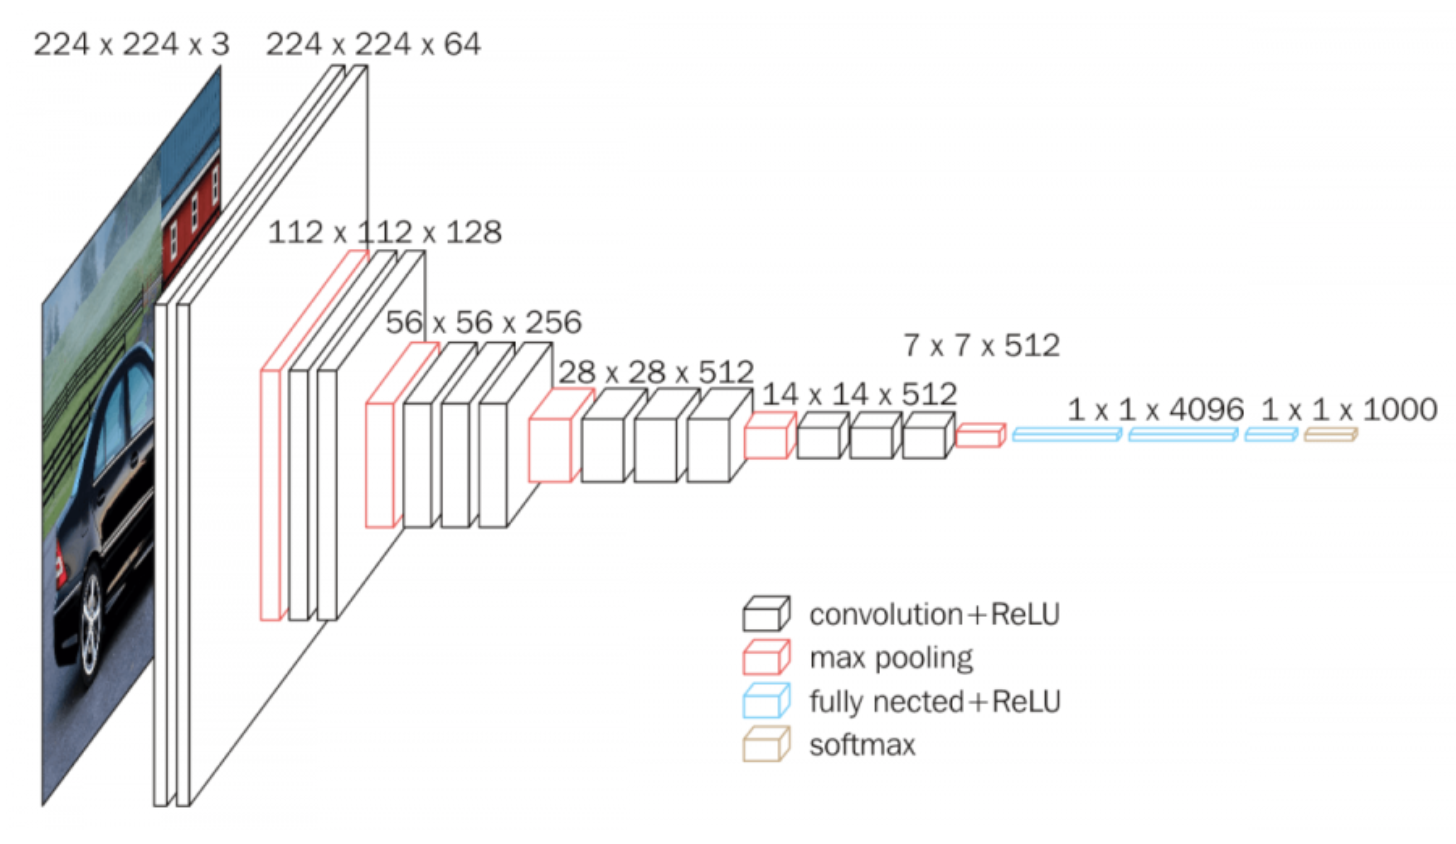

In [25]:
from keras import applications, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input
import keras

#만들어져있는 VGG16Net 모델을 불러오기위해 라이브러리들을 import하는 코드

Using TensorFlow backend.


In [26]:
input_tensor = Input(shape=(224,224,3)) #입력으로 받는 데이터 형태
model = applications.VGG16(input_tensor=input_tensor)
#만들어져있는 vgg모델을 불러오는 과정

In [27]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [28]:
#우리는 정상과 불량 즉, 2개만 분류할 것이기 때문에 include_top 옵션에 False를 준다
input_tensor = Input(shape=(224,224,3))
model = applications.VGG16(include_top=False,
                           input_tensor=input_tensor)
#include_top 옵션에서 True(default)를 주게 되면 출력층까지 모두 불러오고 False를 주게 되면 Convolution 레이어를 이용한 특징을 추출하는 층까지만 불러오게 됨

In [29]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [30]:
new_model = Sequential()
for l in model.layers:
    new_model.add(l)
#불러온 모델에 레이어를 붙일 수가 없어 새로운 모델을 선언하여 똑같은 vgg모델을 만드는 코드

In [31]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [32]:
new_model.add(Flatten()) # 1차원의 벡터로 펼쳐주는 역할
new_model.add(Dense(4096, activation='relu'))
new_model.add(Dense(4096, activation='relu'))
new_model.add(Dense(2, activation='softmax')) #출력값을 2개로 softmax함수로 활성화하는 코드

In [33]:
new_model.summary() #모델의 신경망이 잘 짜여졌는지 확인하는 코드

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [34]:
os.chdir(r'C:\Users\USER\Y') #가중치를 저장할 디렉터리 지정

In [35]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath='vgg16_test.h5', verbose=1, save_best_only=True)
#ModelCheckpoint는 모델이 학습하면서 정의한 조건을 만족했을 때 Model의 weight 값을 중간에 저장해주는 함수
#verbose는 해당 함수의 진행 사항의 출력 여부, save_best_only는 모델의 정확도가 최고값을 갱신했을 때만 저장하도록 하는 옵션

In [36]:
#모델을 학습시키기 이전에, compile 메소드를 통해서 학습 방식에 대한 환경설정!
new_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#gradient와 learning rate 둘다 고려한 adam을 optimizer로 설정
#0(정상)에 속해있는지 1(불량)에 속해있는지 분류하는 것이기 때문에 다중분류 손실함수인 Categorical_crossentropy를 사용
#측정지표로는 acuuracy를 사용

In [37]:
hist = new_model.fit(train_x, train_y, epochs=20, batch_size = 10, validation_data=(test_x, test_y), callbacks = [checkpointer])
#학습 및 검증을 진행하는 코드 

Train on 620 samples, validate on 155 samples
Epoch 1/20
620/620 [==============================] - 9s 15ms/step - loss: 0.5702 - accuracy: 0.7742 - val_loss: 0.5957 - val_accuracy: 0.8000

Epoch 00001: val_loss improved from inf to 0.59572, saving model to vgg16_test.h5
Epoch 2/20
 20/620 [..............................] - ETA: 5s - loss: 0.4538 - accuracy: 0.8500

C:\Users\USER\anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


620/620 [==============================] - 6s 10ms/step - loss: 0.5144 - accuracy: 0.8000 - val_loss: 0.4974 - val_accuracy: 0.8000

Epoch 00002: val_loss improved from 0.59572 to 0.49738, saving model to vgg16_test.h5
Epoch 3/20
620/620 [==============================] - 6s 9ms/step - loss: 0.4779 - accuracy: 0.8000 - val_loss: 0.4728 - val_accuracy: 0.8000

Epoch 00003: val_loss improved from 0.49738 to 0.47275, saving model to vgg16_test.h5
Epoch 4/20
620/620 [==============================] - 6s 10ms/step - loss: 0.4303 - accuracy: 0.8016 - val_loss: 0.5270 - val_accuracy: 0.8000

Epoch 00004: val_loss did not improve from 0.47275
Epoch 5/20
620/620 [==============================] - 6s 10ms/step - loss: 0.2753 - accuracy: 0.8968 - val_loss: 0.4622 - val_accuracy: 0.8194

Epoch 00005: val_loss improved from 0.47275 to 0.46219, saving model to vgg16_test.h5
Epoch 6/20
620/620 [==============================] - 6s 10ms/step - loss: 0.3112 - accuracy: 0.9048 - val_loss: 0.2840 - val_a

In [38]:
test_loss, test_acc = new_model.evaluate(test_x,  test_y, verbose=2)
print('\n검증 정확도:', test_acc)
#evaluate는 모델을 평가하는 것으로 주어진 데이터 집합에 대해 손실을 계산하고 모델에 첨부된 모든 매트릭스을 계산함. 하나의 값에서 손실 및 메트릭을 포함하는 목록을 반환


검증 정확도: 1.0


# 테스트셋으로 테스트하기

In [39]:
new_model.load_weights(r"C:\Users\USER\A\vgg16_test.h5")
#가중치 불러오기

In [40]:
os.chdir(r'C:\Users\USER\A\11BT_final\test') #현재의 기본 디렉토리를 테스트 데이터가 모인 곳으로 디렉토리 변경하는 코드

In [41]:
test_filename = os.listdir(r'C:\Users\USER\A\11BT_final\test') 
#test_filename 변수을 선언하여 테스트가 데이터 있는 파일의 데이터 이름들을 담아내는 코드

In [42]:
test_filename

['a1.png',
 'a10.png',
 'a11.png',
 'a12.png',
 'a13.png',
 'a14.png',
 'a15.png',
 'a16.png',
 'a17.png',
 'a18.png',
 'a2.png',
 'a3.png',
 'a4.png',
 'a5.png',
 'a6.png',
 'a7.png',
 'a8.png',
 'a9.png',
 'n1.png',
 'n10.png',
 'n11.png',
 'n12.png',
 'n13.png',
 'n14.png',
 'n15.png',
 'n16.png',
 'n17.png',
 'n18.png',
 'n19.png',
 'n2.png',
 'n20.png',
 'n21.png',
 'n22.png',
 'n23.png',
 'n24.png',
 'n25.png',
 'n26.png',
 'n27.png',
 'n28.png',
 'n29.png',
 'n3.png',
 'n30.png',
 'n31.png',
 'n32.png',
 'n33.png',
 'n34.png',
 'n35.png',
 'n36.png',
 'n4.png',
 'n5.png',
 'n6.png',
 'n7.png',
 'n8.png',
 'n9.png']

In [43]:
len(test_filename)

54

In [44]:
a_detected = []  #불량으로 분류된 데이터를 담을 공간
n_detected = []  #정상으로 분류된 데이터를 담을 공간

for i in test_filename:
    im = cv2.imread(i, cv2.IMREAD_COLOR) #컬러로 이미지 읽기
    im = cv2.resize(im,(224,224)) #학습에 사용된 데이터의 크기와 똑같이 해줌
    im = np.array(im)
    im = im.reshape(1,224,224,3)
    im = im / 255 #정규화

#학습하기 위해 데이터셋을 구성하는 코드와 동일

    if np.argmax(new_model.predict(im)) == 1:    
        a_detected.append(i) #학습한 모델로 예측한 값이 1(불량)이면 a_detected에 해당 데이터의 파일 이름을 담으라는 코드
        print("파일이름 : " +i)
        print(new_model.predict(im))
        print("불량")
    else:
        n_detected.append(i) #그외는 n_detected에 담으라는 코드
        print("파일이름 : " +i)
        print(new_model.predict(im))
        print("정상")


        
        

파일이름 : a1.png
[[0. 1.]]
불량
파일이름 : a10.png
[[0. 1.]]
불량
파일이름 : a11.png
[[0. 1.]]
불량
파일이름 : a12.png
[[0. 1.]]
불량
파일이름 : a13.png
[[3.3689028e-17 1.0000000e+00]]
불량
파일이름 : a14.png
[[0. 1.]]
불량
파일이름 : a15.png
[[3.6443861e-19 1.0000000e+00]]
불량
파일이름 : a16.png
[[5.4476414e-30 1.0000000e+00]]
불량
파일이름 : a17.png
[[9.049381e-25 1.000000e+00]]
불량
파일이름 : a18.png
[[3.1916547e-19 1.0000000e+00]]
불량
파일이름 : a2.png
[[4.6853518e-07 9.9999952e-01]]
불량
파일이름 : a3.png
[[8.7466555e-21 1.0000000e+00]]
불량
파일이름 : a4.png
[[4.148804e-32 1.000000e+00]]
불량
파일이름 : a5.png
[[3.4238513e-23 1.0000000e+00]]
불량
파일이름 : a6.png
[[0. 1.]]
불량
파일이름 : a7.png
[[0. 1.]]
불량
파일이름 : a8.png
[[0. 1.]]
불량
파일이름 : a9.png
[[0. 1.]]
불량
파일이름 : n1.png
[[1.000e+00 3.923e-09]]
정상
파일이름 : n10.png
[[1.0000000e+00 7.2403966e-10]]
정상
파일이름 : n11.png
[[1.0000000e+00 1.3213995e-09]]
정상
파일이름 : n12.png
[[1.0000000e+00 3.6635793e-08]]
정상
파일이름 : n13.png
[[9.9999952e-01 4.7225768e-07]]
정상
파일이름 : n14.png
[[9.9999976e-01 2.6424496e-07]]
정상
파일이름 : n15.png
[[9.9

In [45]:
a_detected #불량으로 담긴 데이터 확인하기

['a1.png',
 'a10.png',
 'a11.png',
 'a12.png',
 'a13.png',
 'a14.png',
 'a15.png',
 'a16.png',
 'a17.png',
 'a18.png',
 'a2.png',
 'a3.png',
 'a4.png',
 'a5.png',
 'a6.png',
 'a7.png',
 'a8.png',
 'a9.png']

In [46]:
n_detected #정상으로 담긴 데이터 확인하기

['n1.png',
 'n10.png',
 'n11.png',
 'n12.png',
 'n13.png',
 'n14.png',
 'n15.png',
 'n16.png',
 'n17.png',
 'n18.png',
 'n19.png',
 'n2.png',
 'n20.png',
 'n21.png',
 'n22.png',
 'n23.png',
 'n24.png',
 'n25.png',
 'n26.png',
 'n27.png',
 'n28.png',
 'n29.png',
 'n3.png',
 'n30.png',
 'n31.png',
 'n32.png',
 'n33.png',
 'n34.png',
 'n35.png',
 'n36.png',
 'n4.png',
 'n5.png',
 'n6.png',
 'n7.png',
 'n8.png',
 'n9.png']

In [47]:
len(a_detected) #불량으로 담긴 데이터의 수 확인하기

18

In [48]:
len(n_detected) #정상으로 담긴 데이터의 수 확인하기

36